<a href="https://colab.research.google.com/github/jorgecif/CovidDisinformationDetection/blob/main/CompMetClasNoti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de la temática de la información** - Comparación de modelos de aprendizaje automático y aprendizaje profundo


> Por: Jorge Orlando Cifuentes Cifuentes




### Librerías y funciones

In [ ]:
# Generales
import warnings
warnings.filterwarnings('ignore')
#import csv
#import tensorflow as tf
import pandas as pd
import numpy as np
import joblib # Para exportar el modelo
import time


# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression # Logistic
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import LinearSVC # Support Vector
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM
from keras.layers import Conv1D, MaxPooling1D, Embedding, SpatialDropout1D, Dropout, Activation, Flatten


from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model




In [ ]:
# Funciones para comparar modelos

def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc']) # Modifico "acc" por "accuracy"
    plt.plot(history.history['val_acc']) # Modifico "val_acc" por "val_accuracy"
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

def plot_compare_accs3(history1, history2, history3, name1="Red 1",
                      name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara accuracies de tres entrenamientos con nombres name1, name2 y name3"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.plot(history3.history['acc'], color="red")
    plt.plot(history3.history['val_acc'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2,  
                'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()

def plot_compare_losses3(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara losses de tres entrenamientos con nombres name1, name2 y name3"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3],
               loc='upper right')
    plt.show()



### Carga de datos

In [ ]:
# Carga de datos

url_datos = 'https://github.com/jorgecif/CovidDisinformationDetection/blob/main/data/ReutersClasifiedNewsDataset.xlsx?raw=true'

datos = pd.read_excel(url_datos)
print("Se han cargado ", datos.shape[0], " noticias")

datos.columns=["headline", "label"]

# Revuelvo los registros
datos = datos.sample(frac = 1, random_state= 88) 
datos =datos.reset_index()
datos=datos.drop(["index"], axis=1)


# Muestra de los datos 20000 registros
datos=datos.head(20000)


# Muestra de los datos
print(len(datos))
datos.head()


Se han cargado  81868  noticias
20000


,headline,label
0,Chinese gaming company Beijing Kunlun Tech Co ...,technology
1,The Trump administration on Friday gave five c...,enviroment
2,Poor Larry isn't looking too good. He's pale a...,science
3,BNP Paribas plans to cut 5 percent of the work...,finance
4,Czech Petra Kvitova struggled with unforced er...,sports


In [ ]:
# Verifico si hay valores nulos
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  20000 non-null  object
 1   label     20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
#Elimino duplicados de todas las columnas

datos2 = datos.drop_duplicates()
print(len(datos2))

# Elimino ambiguedades

datos3=datos2.drop_duplicates(['headline'], keep='first') # Elimino ambieguedades
print(len(datos3))

19078
18973


In [ ]:
# Desripción de los datos

datos3.describe(include="all")

,headline,label
count,18973,18973
unique,18973,8
top,Millions of sheep and goats in Morocco could b...,technology
freq,1,2934


### Exploración inicial de los datos

In [ ]:
# Reviso las 10 primeras categorías de cada variable categórica

for col in datos3.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(datos3[col].value_counts().head(10))

----------------------------------------headline---------------------------------------- - 

Millions of sheep and goats in Morocco could be killed by a virus which poses a risk to other north African and European countries but not humans, the United Nations Food and Agriculture Organization (FAO) said on Tuesday.                       1
Radiation from Japan's 2011 nuclear disaster has spread off North American shores and contamination is increasing at previously identified sites, although levels are still too low to threaten human or ocean life, scientists said on Thursday.    1
Pope Francis on Monday branded sexual abuse of children by priests a crime comparable to a "satanic Mass" and said he would show zero tolerance for anyone in the Catholic Church who abused children, including bishops.                            1
NEW YORK - Nearly 300 personal items belonging to jazz great Duke Ellington, including the white baby grand piano on which he composed some of his most famous songs, will be sold at auction on May 18 at the National Jazz Museum in Harlem.       1
Senegalese f

----------------------------------------label---------------------------------------- - 

technology    2934
enviroment    2913
lifestyle     2904
sports        2646
health        2444
politics      2308
science       1913
finance        911
Name: label, dtype: int64

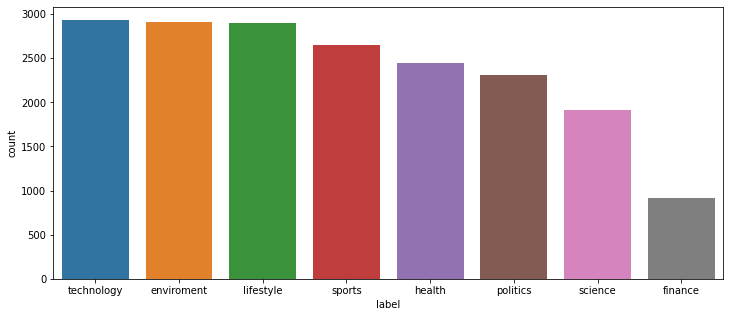

In [ ]:
# Distribución de las categorías datos
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos3, order = datos3["label"].value_counts().index)
plt.show()

### Creación conjunto de datos

In [ ]:
# Reservo unos datos para pruebas finales (datos que no se tocan)

datos_trabajo,datos_reserva = train_test_split(datos3, test_size=0.05, random_state=88 )
datos_trabajo =datos_trabajo.reset_index() # Reinicio índices
datos_reserva =datos_reserva.reset_index() # Reinicio índices
datos_trabajo=datos_trabajo.drop(["index"], axis=1)
datos_reserva=datos_reserva.drop(["index"], axis=1)

print("Datos para trabajar: ", len(datos_trabajo))
print("Datos reservados para pruebas finales ", len(datos_reserva))



Datos para trabajar:  18024
Datos reservados para pruebas finales  949


In [ ]:
datos_reserva.head()

,headline,label
0,U.S. weapons makers have teamed up with medica...,health
1,The governor of Louisiana and the mayor of New...,enviroment
2,Li Zhongying was freed from a Chinese labor ca...,lifestyle
3,"As the sun rises over the Demerara River, a ha...",lifestyle
4,Brazil's President Jair Bolsonaro on Tuesday a...,enviroment


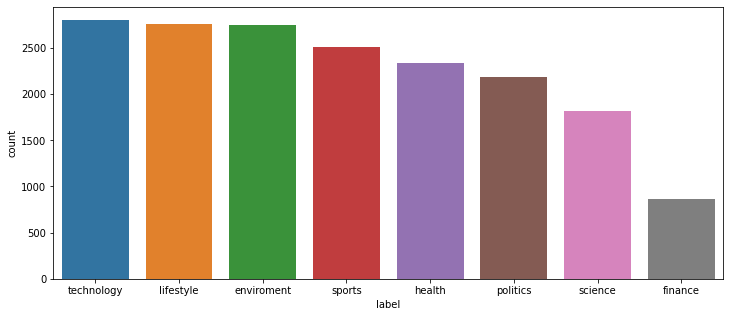

In [ ]:
# Distribución de las categorías datos de trabajo
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_trabajo, order = datos_trabajo["label"].value_counts().index)
plt.show()

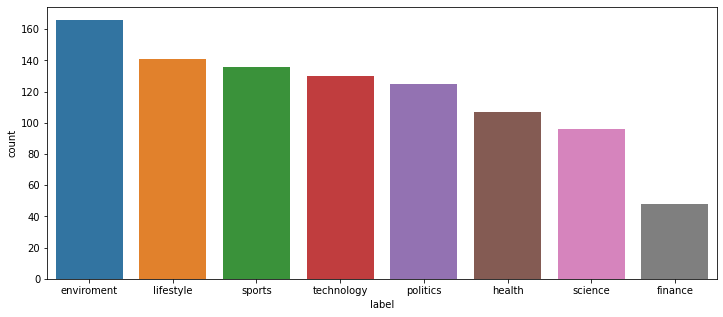

In [ ]:
# Distribución de las categorías datos reservados
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_reserva, order = datos_reserva["label"].value_counts().index)
plt.show()

### Preparación de los datos

In [ ]:
# Convierto categorías en números - datos de trabajo

# Extraigo datos de titulares
corpus = datos_trabajo["headline"]
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus).toarray()

# Construyo mapa de categorías datos trabajo
categories = datos_trabajo["label"].unique()
category_dict = {value:index for index, value in enumerate(categories)}
results_trabajo = datos_trabajo["label"].map(category_dict)
category_dict


# Construyo mapa de categorías datos reservados
categories = datos_reserva["label"].unique()
category_dict = {value:index for index, value in enumerate(categories)}
results_reserva = datos_reserva["label"].map(category_dict)
category_dict

{'enviroment': 1,
 'finance': 3,
 'health': 0,
 'lifestyle': 2,
 'politics': 5,
 'science': 7,
 'sports': 4,
 'technology': 6}

In [ ]:
category_dict_inv = {v: k for k, v in category_dict.items()}
category_dict_inv

{0: 'health',
 1: 'enviroment',
 2: 'lifestyle',
 3: 'finance',
 4: 'sports',
 5: 'politics',
 6: 'technology',
 7: 'science'}

### Train-test-split

In [ ]:
# Train - Test Split

x_train,x_test, y_train,y_test = train_test_split(X, results_trabajo, test_size=0.2, random_state=88 )

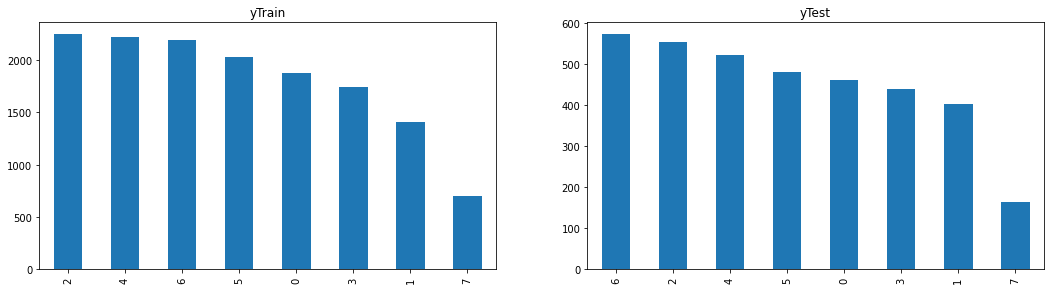

In [ ]:
# Visualizo el balance de las clases luego de la división para verificar que no exista un desbalance
df_y_train = pd.DataFrame({'yTrain': y_train})

df_y_test = pd.DataFrame({'yTest': y_test})


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 10))
plt.subplot(2, 2, 1).set_title('yTrain')
df_y_train["yTrain"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2).set_title('yTest')
df_y_test["yTest"].value_counts().plot(kind='bar')

### Comparación de modelos de aprendizaje automático

In [ ]:
category_dict_inv = {v: k for k, v in category_dict.items()}


In [ ]:
category_dict

{'enviroment': 1,
 'finance': 3,
 'health': 0,
 'lifestyle': 2,
 'politics': 5,
 'science': 7,
 'sports': 4,
 'technology': 6}

In [ ]:
category_dict_inv

{0: 'health',
 1: 'enviroment',
 2: 'lifestyle',
 3: 'finance',
 4: 'sports',
 5: 'politics',
 6: 'technology',
 7: 'science'}

In [ ]:
# Comparación de modelos
# Listado de modelos
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    ]

In [ ]:
# Generación de los modelos con validación cruzada
start=time.clock()

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

end = time.clock()
print("Tiempo de entrenamiento: ", (end-start)/60, " minutos")

Tiempo de entrenamiento:  36.74945618333334  minutos


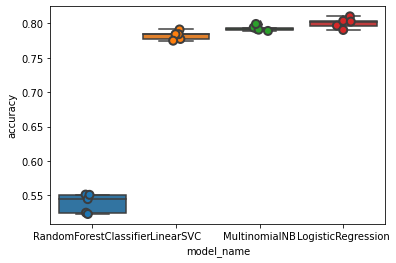

In [ ]:
# Gráfico comparativo de la precisión estimada de los modelos
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

#### Modelo Random Forest

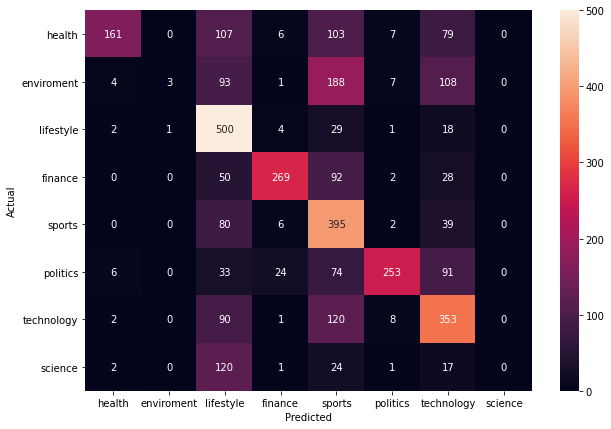

In [ ]:
# Modelo RandomForest
from sklearn.metrics import confusion_matrix

modelRF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Modelo Logistic

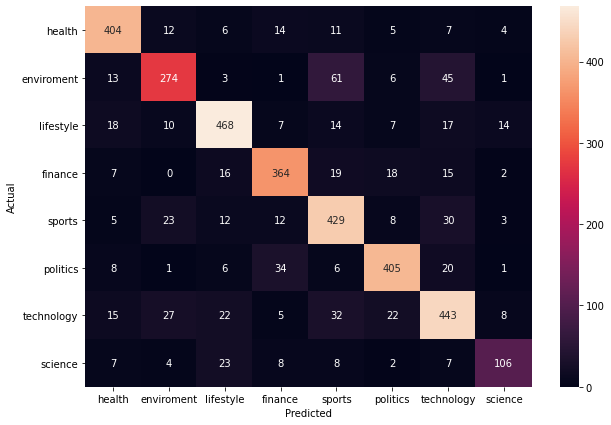

In [ ]:
# Modelo Logistic
from sklearn.metrics import confusion_matrix

modelLOG = LogisticRegression(random_state=0)
modelLOG.fit(x_train, y_train)
y_pred = modelLOG.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Modelo Naïve Bayes

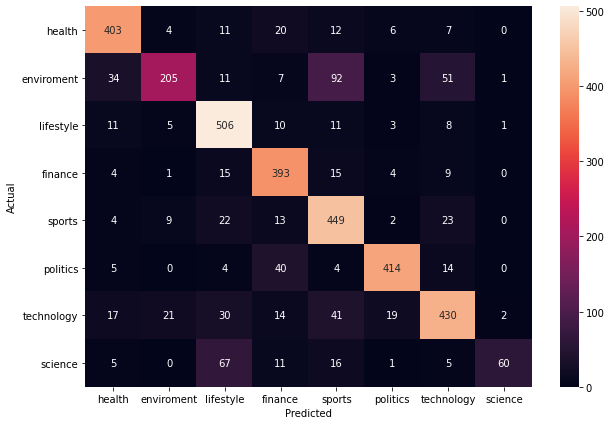

In [ ]:
# Modelo Multinomial Naive Bayes
from sklearn.metrics import confusion_matrix

modelNB = MultinomialNB()
modelNB.fit(x_train, y_train)
y_pred = modelNB.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Modelo vector de soporte lineal

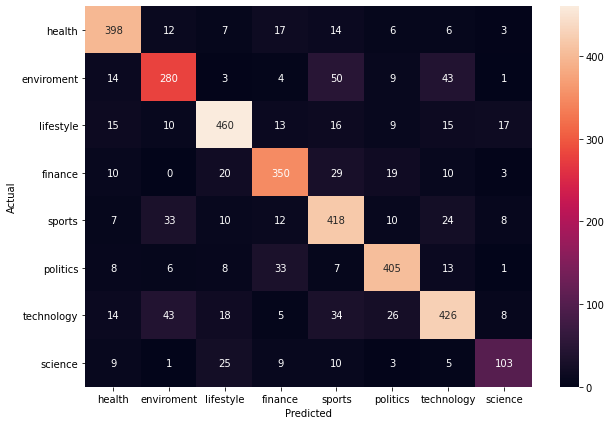

In [ ]:
# Modelo Vector Soporte Lineal
from sklearn.metrics import confusion_matrix

modelSVC = LinearSVC()
modelSVC.fit(x_train, y_train)
y_pred = modelSVC.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Prueba de los modelos

In [ ]:
# Función para probar modelos y predecir la categoría de la noticia
# De acuerdo con: category_dict_inv[0]

def newscategorifier(a, modelo_probar):
    clf=modelo_probar
    test_name1 = [a]
    transform_vect =vectorizer.transform(test_name1).toarray()
    print(transform_vect)
    #print(clf.predict(transform_vect))
    if clf.predict(transform_vect) == 0:
        print(category_dict_inv[0])
    elif clf.predict(transform_vect) == 1:
        print(category_dict_inv[1])
    elif clf.predict(transform_vect) == 2:
        print(category_dict_inv[2])
    elif clf.predict(transform_vect) == 3:
        print(category_dict_inv[3])
    elif clf.predict(transform_vect) == 4:
        print(category_dict_inv[4])    
    elif clf.predict(transform_vect) == 5:
        print(category_dict_inv[5])
    elif clf.predict(transform_vect) == 6:
        print(category_dict_inv[6]) 
    else:
        print(category_dict_inv[7])

In [ ]:
# Prueba con textos de datos de reserva

text1=datos_reserva["headline"][0]
text2=datos_reserva["headline"][55]
text3=datos_reserva["headline"][88]

print("Texto 1: ", text1)
print("Categoria real: ",datos_reserva["label"][0])

print("Texto 2: ", text2)
print("Categoria real: ",datos_reserva["label"][55])

print("Texto 3: ", text3)
print("Categoria real: ",datos_reserva["label"][88])

Texto 1:  U.S. weapons makers have teamed up with medical device companies to increase the supply of ventilators that can be used to combat the coronavirus pandemic, people working on the project said.
Categoria real:  health
Texto 2:  Activision Blizzard is betting big on children's fantasy adventure game "Skylanders" this holiday, with the launch of a new title on Sunday and plans for more mobile versions of the console game.
Categoria real:  lifestyle
Texto 3:  Lane Thomas clubbed a two-run homer in the second inning and Justin Williams hit a solo blast later in the frame to help the St. Louis Cardinals post a 7-5 victory over the host Houston Astros on Wednesday at West Palm Beach, Fla.
Categoria real:  sports


In [ ]:
# Prueba con los modelos

clasificar_texto=text3

print("Modelo SVC")
print(newscategorifier(clasificar_texto, modelSVC))

print(" ")
print("Modelo NB")
print(newscategorifier(clasificar_texto, modelNB))

print(" ")
print("Modelo LOG")
print(newscategorifier(clasificar_texto, modelLOG))

print(" ")
print("Modelo RF")
print(newscategorifier(clasificar_texto, modelRF))

Modelo SVC
[[0 0 0 ... 0 0 0]]
politics
None
 
Modelo NB
[[0 0 0 ... 0 0 0]]
politics
None
 
Modelo LOG
[[0 0 0 ... 0 0 0]]
politics
None
 
Modelo RF
[[0 0 0 ... 0 0 0]]
sports
None


#### Generacion de archivos de modelos

In [ ]:
## Guardo los modelos en archivos

filename = 'SVC_model.pkl'
joblib.dump(modelSVC, filename)

filename = 'NB_model.pkl'
joblib.dump(modelNB, filename)

filename = 'LOG_model.pkl'
joblib.dump(modelLOG, filename)

filename = 'RF_model.pkl'
joblib.dump(modelRF, filename)

filename = 'vectorizer.pkl'
joblib.dump(vectorizer, filename)


['vectorizer.pkl']

### Comparación de modelos de aprendizaje profundo

#### Preparación de datos

In [ ]:
# Parámetros
n_most_common_words = 8000
max_len = 130

# Creo tokenizador con todos los datos
corpus = datos_trabajo["headline"]
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(corpus.values)
word_index = tokenizer.word_index
print('Se encontraron %s tokens únicos' % len(word_index))

Se encontraron 31197 tokens únicos


In [ ]:
# Tokenización datos 

# Trabajo
corpus_trabajo = datos_trabajo["headline"]
sequences = tokenizer.texts_to_sequences(corpus_trabajo.values)
X = pad_sequences(sequences, maxlen=max_len)


# Reserva
corpus_reserva = datos_reserva["headline"]
sequences_reserva = tokenizer.texts_to_sequences(corpus_reserva.values)
X_reserva = pad_sequences(sequences_reserva, maxlen=max_len)

In [ ]:
# Categorías

# Categorías datos de trabajo

labels = to_categorical(results_trabajo, num_classes=8)

# Categorías datos reserva

labels_reserva = to_categorical(results_reserva, num_classes=8)

In [ ]:
# Train - Test Split

x_train,x_test, y_train,y_test = train_test_split(X, labels, test_size=0.2, random_state=88 )

#### Modelo base inicial

In [ ]:
# Parámetros de la red
epochs = 20
emb_dim = 128
batch_size = 256

In [ ]:
# Creación del modelo y compilación

model_base = tf.keras.Sequential([
    tf.keras.layers.Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model_base.summary()

# Compilación

model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 16640)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                532512    
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 264       
Total params: 1,556,776
Trainable params: 1,556,776
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento


start=time.clock()

history_base = model_base.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
end = time.clock()
tiempo_base=(end-start)/60
print("Tiempo de entrenamiento: ", tiempo_base, " minutos")

Epoch 1/20
46/46 [==============================] - 1s 30ms/step - loss: 2.0019 - acc: 0.1879 - val_loss: 1.9082 - val_acc: 0.3006
Epoch 2/20
46/46 [==============================] - 1s 27ms/step - loss: 1.7307 - acc: 0.4313 - val_loss: 1.5837 - val_acc: 0.5170
Epoch 3/20
46/46 [==============================] - 1s 27ms/step - loss: 1.3298 - acc: 0.6328 - val_loss: 1.2413 - val_acc: 0.6512
Epoch 4/20
46/46 [==============================] - 1s 27ms/step - loss: 0.8935 - acc: 0.7717 - val_loss: 0.9656 - val_acc: 0.7302
Epoch 5/20
46/46 [==============================] - 1s 27ms/step - loss: 0.5613 - acc: 0.8581 - val_loss: 0.8174 - val_acc: 0.7514
Epoch 6/20
46/46 [==============================] - 1s 27ms/step - loss: 0.3543 - acc: 0.9111 - val_loss: 0.7580 - val_acc: 0.7705
Epoch 7/20
46/46 [==============================] - 1s 27ms/step - loss: 0.2311 - acc: 0.9536 - val_loss: 0.7526 - val_acc: 0.7684
Epoch 8/20
46/46 [==============================] - 1s 26ms/step - loss: 0.1549 - a

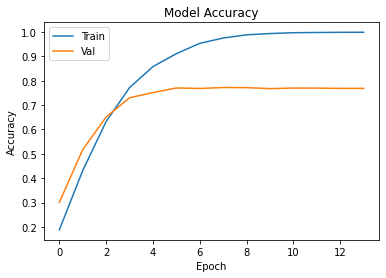

In [ ]:
# Resultados

# Accuracy
plot_acc(history_base)

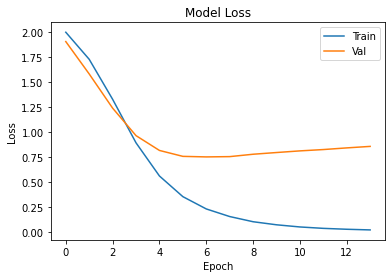

In [ ]:
# Loss
plot_loss(history_base)

#### Modelo redes convolucionales - CNN

In [ ]:
# Parámetros de la red
epochs = 20
emb_dim = 128
batch_size = 256

In [ ]:
# Creación del modelo y compilación

model_CNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]),
    tf.keras.layers.Conv1D(128, 8, activation='sigmoid'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Compilación
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model_CNN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 123, 128)          131200    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 264       
Total params: 1,159,592
Trainable params: 1,159,592
Non-trainable params: 0
____________________________________________

In [ ]:
# Entrenamiento

start=time.clock()
history_CNN = model_CNN.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
end = time.clock()
tiempo_CNN=(end-start)/60
print("Tiempo de entrenamiento: ", tiempo_CNN, " minutos")

Epoch 1/20
46/46 [==============================] - 15s 337ms/step - loss: 2.0886 - acc: 0.1371 - val_loss: 2.0302 - val_acc: 0.1560
Epoch 2/20
46/46 [==============================] - 16s 359ms/step - loss: 2.0286 - acc: 0.1695 - val_loss: 1.9989 - val_acc: 0.1512
Epoch 3/20
46/46 [==============================] - 18s 385ms/step - loss: 1.9627 - acc: 0.2329 - val_loss: 1.8886 - val_acc: 0.4026
Epoch 4/20
46/46 [==============================] - 18s 394ms/step - loss: 1.8269 - acc: 0.3498 - val_loss: 1.7307 - val_acc: 0.4688
Epoch 5/20
46/46 [==============================] - 19s 416ms/step - loss: 1.6638 - acc: 0.4298 - val_loss: 1.5948 - val_acc: 0.4993
Epoch 6/20
46/46 [==============================] - 19s 424ms/step - loss: 1.5135 - acc: 0.4848 - val_loss: 1.4578 - val_acc: 0.5316
Epoch 7/20
46/46 [==============================] - 19s 406ms/step - loss: 1.3622 - acc: 0.5423 - val_loss: 1.3454 - val_acc: 0.5458
Epoch 8/20
46/46 [==============================] - 18s 385ms/step - 

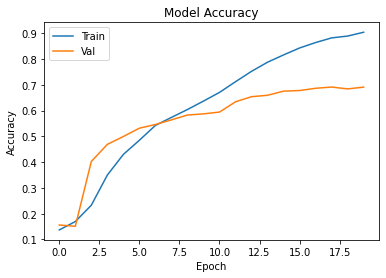

In [ ]:
# Resultados

# Accuracy
plot_acc(history_CNN)

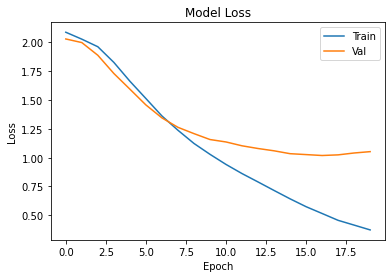

In [ ]:
# Loss
plot_loss(history_CNN)

#### Modelo redes recurrentes

In [ ]:
# Parámetros de la red
epochs = 20
emb_dim = 128
batch_size = 256

In [ ]:
# Creación del modelo y compilación

model_RNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.7),
    tf.keras.layers.LSTM(64, dropout=0.7, recurrent_dropout=0.7),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model_RNN.summary()

# Compilación

model_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 130, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
Total params: 1,075,752
Trainable params: 1,075,752
Non-trainable params: 0
____________________________________________

In [ ]:
# Entrenamiento

start=time.clock()

history_RNN = model_RNN.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
end = time.clock()
tiempo_RNN=(end-start)/60
print("Tiempo de entrenamiento: ", tiempo_RNN, " minutos")

Epoch 1/20
46/46 [==============================] - 20s 445ms/step - loss: 2.0524 - acc: 0.1583 - val_loss: 2.0234 - val_acc: 0.1588
Epoch 2/20
46/46 [==============================] - 19s 420ms/step - loss: 1.9872 - acc: 0.2203 - val_loss: 1.8151 - val_acc: 0.2781
Epoch 3/20
46/46 [==============================] - 19s 420ms/step - loss: 1.7268 - acc: 0.3597 - val_loss: 1.4309 - val_acc: 0.5295
Epoch 4/20
46/46 [==============================] - 20s 426ms/step - loss: 1.4621 - acc: 0.4807 - val_loss: 1.1595 - val_acc: 0.6248
Epoch 5/20
46/46 [==============================] - 20s 427ms/step - loss: 1.2353 - acc: 0.5762 - val_loss: 0.9508 - val_acc: 0.6952
Epoch 6/20
46/46 [==============================] - 19s 420ms/step - loss: 1.0710 - acc: 0.6367 - val_loss: 0.8504 - val_acc: 0.7382
Epoch 7/20
46/46 [==============================] - 20s 434ms/step - loss: 0.9569 - acc: 0.6820 - val_loss: 0.8081 - val_acc: 0.7469
Epoch 8/20
46/46 [==============================] - 20s 431ms/step - 

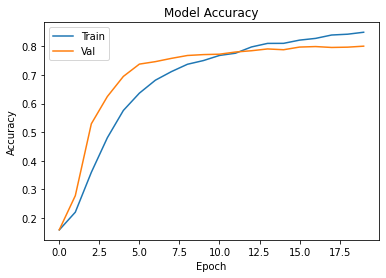

In [ ]:
# Resultados

# Accuracy
plot_acc(history_RNN)

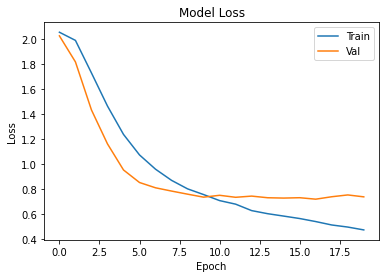

In [ ]:
# Loss
plot_loss(history_RNN)

#### Comparación de modelos

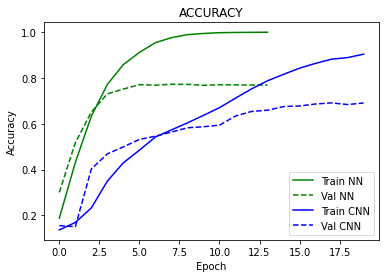

In [ ]:
# Comparación NN vs CNN - Accuracy
plot_compare_accs(history_base, history_CNN, 'NN', 'CNN', 'ACCURACY')

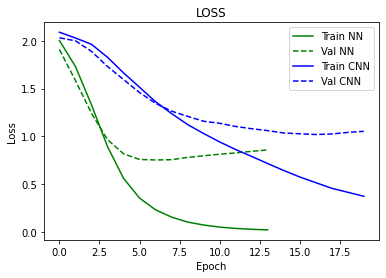

In [ ]:
# Comparación NN vs CNN - Loss
plot_compare_losses(history_base, history_CNN, 'NN', 'CNN', 'LOSS')

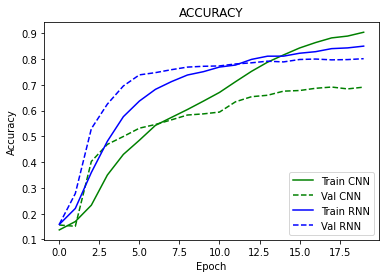

In [ ]:
# Comparación CNN vs RNN - Accuracy
plot_compare_accs(history_CNN, history_RNN, 'CNN', 'RNN', 'ACCURACY')

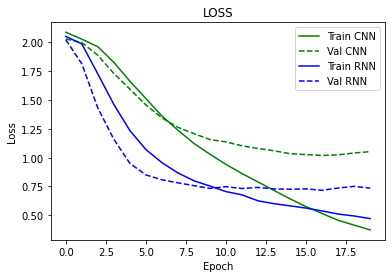

In [ ]:
# Comparación CNN vs RNN - Loss
plot_compare_losses(history_CNN, history_RNN, 'CNN', 'RNN', 'LOSS')

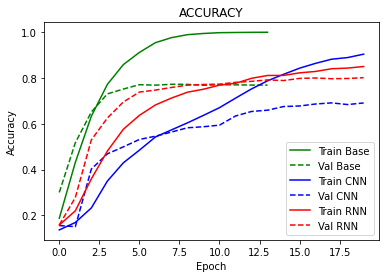

In [ ]:
# Comparo 3 modelos Accuracy
plot_compare_accs3(history_base, history_CNN, history_RNN, 'Base', 'CNN', 'RNN', 'ACCURACY')

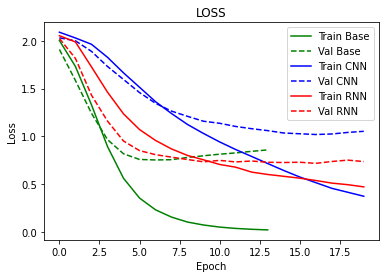

In [ ]:
# Comparo 3 modelos Loss
plot_compare_losses3(history_base, history_CNN, history_RNN, 'Base', 'CNN', 'RNN', 'LOSS')

#### Prueba de modelos de aprendizaje profundo

In [ ]:
# Prueba con textos de datos de reserva

text1=datos_reserva["headline"][120]
text2=datos_reserva["headline"][55]
text3=datos_reserva["headline"][88]

print("Texto 1: ", text1)
print("Categoria real: ",datos_reserva["label"][120])

print("Texto 2: ", text2)
print("Categoria real: ",datos_reserva["label"][55])

print("Texto 3: ", text3)
print("Categoria real: ",datos_reserva["label"][88])

Texto 1:  Fidelity Investments Inc has become the first financial institution to join the Initiative for CryptoCurrencies & Contracts, a group of academic institutions and technology companies looking to develop blockchain-based technology.
Categoria real:  technology
Texto 2:  Activision Blizzard is betting big on children's fantasy adventure game "Skylanders" this holiday, with the launch of a new title on Sunday and plans for more mobile versions of the console game.
Categoria real:  lifestyle
Texto 3:  Lane Thomas clubbed a two-run homer in the second inning and Justin Williams hit a solo blast later in the frame to help the St. Louis Cardinals post a 7-5 victory over the host Houston Astros on Wednesday at West Palm Beach, Fla.
Categoria real:  sports


In [ ]:
# Función para prueba

def newscategorifier_n(a, modelo_probar):
    clf=modelo_probar
    # Tokenizacion
    corpus_1=[]
    corpus_1.append(a)
    corpus_2=pd.Series(corpus_1)
    sequences_reserva = tokenizer.texts_to_sequences(corpus_2.values)
    transform_vect_reserva= pad_sequences(sequences_reserva, maxlen=max_len)
    print(transform_vect_reserva)

    prediccion=clf.predict(transform_vect_reserva)
    prediccion_a = np.array(prediccion)
    print(prediccion_a)    
    indice_max = prediccion_a.argmax()
    print(indice_max)

    if indice_max == 0:
       print(category_dict_inv[0])
    elif indice_max == 1:
       print(category_dict_inv[1])
    elif indice_max == 2:
      print(category_dict_inv[2])
    elif indice_max == 3:
      print(category_dict_inv[3])
    elif indice_max == 4:
      print(category_dict_inv[4])    
    elif indice_max == 5:
      print(category_dict_inv[5])
    elif indice_max == 6:
      print(category_dict_inv[6]) 
    else:
      print(category_dict_inv[7])

In [ ]:
# Prueba Única

test=datos_reserva["headline"][120]
  
corpus_t=[]
corpus_t.append(test)
corpus_t=pd.Series(corpus_t)
  
  
sequences_reserva = tokenizer.texts_to_sequences(corpus_t.values)
transform_vect_reserva= pad_sequences(sequences_reserva, maxlen=max_len)

transform_vect_reserva

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 1758,   50,   18,  375,    1,   44,  192, 6531,    2,
        1453,    1, 2582,    9, 2754, 4074,    3,   87,    4, 5020, 3638,
           7,  179,  131,  687,    2,  783, 2867,  274,  179]],
      dtype=int32)

In [ ]:
X_reserva[120]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1758,   50,   18,  375,    1,   44,  192, 6531,    2,
       1453,    1, 2582,    9, 2754, 4074,    3,   87,    4, 5020, 3638,
          7,  179,  131,  687,    2,  783, 2867,  274,  179], dtype=int32)

In [ ]:
# Prueba con función

clasificar_texto=text1
print(clasificar_texto)

print("Modelo NN")
print(newscategorifier_n(clasificar_texto, model_base))

print(" ")
print("Modelo CNN")
print(newscategorifier_n(clasificar_texto, model_CNN))

print(" ")
print("Modelo RNN")
print(newscategorifier_n(clasificar_texto, model_RNN))


Fidelity Investments Inc has become the first financial institution to join the Initiative for CryptoCurrencies & Contracts, a group of academic institutions and technology companies looking to develop blockchain-based technology.
Modelo NN
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 1758   50   18  375    1   44  192 6531    2 1453    1
  2582    9 2754 4074    3   87    4 5020 3638    7  179  131  687    2
   783 2867  274  179]]
[[1.9556187e-06 7.7670338e-06 9.9866760e-01 3.2398032e-07 2.5248607e-07
  1.5275278e-04

#### Generación de archivos de modelos de aprendizaje profundo

In [ ]:
## Guardo los modelos en archivos


model_base.save('model_base.h5') 

model_CNN.save('model_CNN.h5') 

model_RNN.save('model_RNN.h5') 